In [2]:
import gymnasium as gym
import numpy as np

# Load MountainCar environment
env = gym.make('MountainCar-v0')

Q = {}
# Discretize position and velocity
position_bins = np.linspace(-1.2, 0.6, num=20)  # 20 bins for position
velocity_bins = np.linspace(-0.07, 0.07, num=20)  # 20 bins for velocity

def discretize_state(state):
    """Convert continuous state to discrete bins."""
    position, velocity = state
    pos_idx = np.digitize(position, bins=position_bins) - 1
    vel_idx = np.digitize(velocity, bins=velocity_bins) - 1
    return pos_idx, vel_idx

# Initialize Q-table
num_actions = env.action_space.n  # MountainCar has 3 actions

for position in range(len(position_bins)):
    for velocity in range(len(velocity_bins)):
        Q[(position, velocity, int(num_actions))] = 0.0


print(position_bins)
print(velocity_bins)

Q


[-1.2        -1.10526316 -1.01052632 -0.91578947 -0.82105263 -0.72631579
 -0.63157895 -0.53684211 -0.44210526 -0.34736842 -0.25263158 -0.15789474
 -0.06315789  0.03157895  0.12631579  0.22105263  0.31578947  0.41052632
  0.50526316  0.6       ]
[-0.07       -0.06263158 -0.05526316 -0.04789474 -0.04052632 -0.03315789
 -0.02578947 -0.01842105 -0.01105263 -0.00368421  0.00368421  0.01105263
  0.01842105  0.02578947  0.03315789  0.04052632  0.04789474  0.05526316
  0.06263158  0.07      ]


{(0, 0, 3): 0.0,
 (0, 1, 3): 0.0,
 (0, 2, 3): 0.0,
 (0, 3, 3): 0.0,
 (0, 4, 3): 0.0,
 (0, 5, 3): 0.0,
 (0, 6, 3): 0.0,
 (0, 7, 3): 0.0,
 (0, 8, 3): 0.0,
 (0, 9, 3): 0.0,
 (0, 10, 3): 0.0,
 (0, 11, 3): 0.0,
 (0, 12, 3): 0.0,
 (0, 13, 3): 0.0,
 (0, 14, 3): 0.0,
 (0, 15, 3): 0.0,
 (0, 16, 3): 0.0,
 (0, 17, 3): 0.0,
 (0, 18, 3): 0.0,
 (0, 19, 3): 0.0,
 (1, 0, 3): 0.0,
 (1, 1, 3): 0.0,
 (1, 2, 3): 0.0,
 (1, 3, 3): 0.0,
 (1, 4, 3): 0.0,
 (1, 5, 3): 0.0,
 (1, 6, 3): 0.0,
 (1, 7, 3): 0.0,
 (1, 8, 3): 0.0,
 (1, 9, 3): 0.0,
 (1, 10, 3): 0.0,
 (1, 11, 3): 0.0,
 (1, 12, 3): 0.0,
 (1, 13, 3): 0.0,
 (1, 14, 3): 0.0,
 (1, 15, 3): 0.0,
 (1, 16, 3): 0.0,
 (1, 17, 3): 0.0,
 (1, 18, 3): 0.0,
 (1, 19, 3): 0.0,
 (2, 0, 3): 0.0,
 (2, 1, 3): 0.0,
 (2, 2, 3): 0.0,
 (2, 3, 3): 0.0,
 (2, 4, 3): 0.0,
 (2, 5, 3): 0.0,
 (2, 6, 3): 0.0,
 (2, 7, 3): 0.0,
 (2, 8, 3): 0.0,
 (2, 9, 3): 0.0,
 (2, 10, 3): 0.0,
 (2, 11, 3): 0.0,
 (2, 12, 3): 0.0,
 (2, 13, 3): 0.0,
 (2, 14, 3): 0.0,
 (2, 15, 3): 0.0,
 (2, 16, 3): 0.0,
 (2,

In [3]:
import gymnasium as gym
import numpy as np
import random

# Load MountainCar environment
env = gym.make('MountainCar-v0')

# Discretize position and velocity
position_bins = np.linspace(-1.2, 0.6, num=20)  # 20 bins for position
velocity_bins = np.linspace(-0.07, 0.07, num=20)  # 20 bins for velocity

def discretize_state(state):
    """Convert continuous state to discrete bins."""
    position, velocity = state
    pos_idx = np.clip(np.digitize(position, bins=position_bins) - 1, 0, len(position_bins) - 1)
    vel_idx = np.clip(np.digitize(velocity, bins=velocity_bins) - 1, 0, len(velocity_bins) - 1)
    return int(pos_idx), int(vel_idx)


# Initialize Q-table
num_actions = env.action_space.n  # MountainCar has 3 actions

q_table = {}
for position in range(len(position_bins)):
    for velocity in range(len(velocity_bins)):
        for action in range(num_actions):
            q_table[(position, velocity, action)] = 0.0  # Initialize Q-values to 0.0

# Epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    """Choose an action using epsilon-greedy policy."""
    pos_idx, vel_idx = state
    if random.uniform(0, 1) < epsilon:
        action = random.choice(range(num_actions) )
    else:
        action = np.argmax([q_table[(pos_idx, vel_idx, action)] for action in range(num_actions)])

    return action

# Q-learning parameters
alpha = 0.8 
gamma = 0.95 
epsilon = 0.1  
num_episodes = 2000 
num_steps = 200  

# Training loop
rewards = []
for i in range(num_episodes):

    s, _ = env.reset()

    s = discretize_state(s)  # Discretize the initial state

    total_reward = 0

    for t in range(num_steps):
        # Select action using epsilon-greedy policy
        a = epsilon_greedy(s, epsilon)

        # Take the action and observe the next state and reward
        s_, r, done, _, _ = env.step(a)

        s_ = discretize_state(s_)

        # Update Q-value using Bellman equation
        best_next_action = np.argmax([q_table[(s_[0], s_[1], action)] for action in range(num_actions)])  # Max Q-value for next state
        q_table[(s[0], s[1], a)] += alpha * (r + gamma * np.max([q_table[(s_[0], s_[1], action)] for action in range(num_actions)]) - q_table[(s[0], s[1], a)])

        # Convert updated Q-value to regular float (if it's not already)
        q_table[(s[0], s[1], a)] = float(q_table[(s[0], s[1], a)])

        # Update state
        s = s_
        total_reward += r

        # Break if terminal state is reached
        if done:
            break

    if (i + 1) % 100 == 0:
        print(f"Episode {i + 1}/{num_episodes}: Total Reward = {total_reward}, Epsilon = {epsilon:.3f}")

env.close()


Episode 100/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 200/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 300/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 400/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 500/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 600/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 700/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 800/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 900/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1000/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1100/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1200/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1300/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1400/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1500/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1600/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1700/2000: Total Reward = -200.0, Epsilon = 0.100
Episode 1800/2000: Tota

In [4]:
q_table

{(0, 0, 0): 0.0,
 (0, 0, 1): 0.0,
 (0, 0, 2): 0.0,
 (0, 1, 0): 0.0,
 (0, 1, 1): 0.0,
 (0, 1, 2): 0.0,
 (0, 2, 0): 0.0,
 (0, 2, 1): 0.0,
 (0, 2, 2): 0.0,
 (0, 3, 0): -0.8,
 (0, 3, 1): -11.60422735045375,
 (0, 3, 2): 0.0,
 (0, 4, 0): -17.247109832516465,
 (0, 4, 1): -17.306979719125938,
 (0, 4, 2): -17.311000198686852,
 (0, 5, 0): -17.40597597989501,
 (0, 5, 1): -17.538630614984992,
 (0, 5, 2): -16.291503455918065,
 (0, 6, 0): -17.48159428155934,
 (0, 6, 1): -15.45369588457338,
 (0, 6, 2): -17.49218234214175,
 (0, 7, 0): -16.694222561472486,
 (0, 7, 1): -16.438383864207445,
 (0, 7, 2): -16.652875115818222,
 (0, 8, 0): -17.00343085299969,
 (0, 8, 1): -17.155009738619455,
 (0, 8, 2): -16.62372308819176,
 (0, 9, 0): -16.66675349009997,
 (0, 9, 1): -16.99079648229435,
 (0, 9, 2): -17.211712319765773,
 (0, 10, 0): -17.460630751039307,
 (0, 10, 1): -17.42098839930573,
 (0, 10, 2): -16.748457182024843,
 (0, 11, 0): -16.803281067817494,
 (0, 11, 1): -16.57284003061096,
 (0, 11, 2): -16.471283857

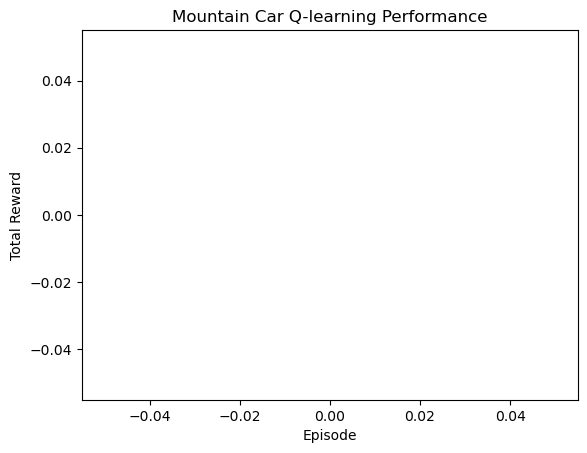

In [6]:
import matplotlib.pyplot as plt

plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Mountain Car Q-learning Performance')
plt.show()

In [19]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Load MountainCar environment
env = gym.make('MountainCar-v0')

# Discretize position and velocity
position_bins = np.linspace(-1.2, 0.6, num=30)  # Increased to 30 bins for position
velocity_bins = np.linspace(-0.07, 0.07, num=30)  # Increased to 30 bins for velocity

def discretize_state(state):
    """Convert continuous state to discrete bins."""
    position, velocity = state
    pos_idx = np.clip(np.digitize(position, bins=position_bins) - 1, 0, len(position_bins) - 1)
    vel_idx = np.clip(np.digitize(velocity, bins=velocity_bins) - 1, 0, len(velocity_bins) - 1)
    return int(pos_idx), int(vel_idx)

# Initialize Q-table
num_actions = env.action_space.n  # MountainCar has 3 actions

q_table = {}
for position in range(len(position_bins)):
    for velocity in range(len(velocity_bins)):
        for action in range(num_actions):
            q_table[(position, velocity, action)] = 0.0  # Initialize Q-values to 0.0

# Epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    """Choose an action using epsilon-greedy policy."""
    pos_idx, vel_idx = state
    if random.uniform(0, 1) < epsilon:
        action = random.choice(range(num_actions))
    else:
        action = np.argmax([q_table[(pos_idx, vel_idx, action)] for action in range(num_actions)])
    return action

# Q-learning parameters
alpha = 0.1  # Decreased learning rate
gamma = 0.99  # Increased discount factor
epsilon = 1.0  # Start with high exploration
epsilon_decay = 0.995  # Decay epsilon
min_epsilon = 0.01
num_episodes = 5000  # Increased number of episodes
num_steps = 200

# Training loop
rewards = []
for i in range(num_episodes):
    s, _ = env.reset()
    s = discretize_state(s)  # Discretize the initial state
    total_reward = 0

    for t in range(num_steps):
        # Select action using epsilon-greedy policy
        a = epsilon_greedy(s, epsilon)

        # Take the action and observe the next state and reward
        s_, r, done, _, _ = env.step(a)
        s_ = discretize_state(s_)

        # Update Q-value using Bellman equation
        best_next_action = np.argmax([q_table[(s_[0], s_[1], action)] for action in range(num_actions)])  # Max Q-value for next state
        q_table[(s[0], s[1], a)] += alpha * (r + gamma * q_table[(s_[0], s_[1], best_next_action)] - q_table[(s[0], s[1], a)])

        # Update state
        s = s_
        total_reward += r

        # Break if terminal state is reached
        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards.append(total_reward)
    if (i + 1) % 100 == 0:
        print(f"Episode {i + 1}/{num_episodes}: Total Reward = {total_reward}, Epsilon = {epsilon:.3f}")

env.close()

# # Smooth rewards using moving average
# def moving_average(data, window_size):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# smoothed_rewards = moving_average(rewards, window_size=50)

# # Plotting the results
# plt.figure(figsize=(12, 6))
# plt.plot(smoothed_rewards, label='Smoothed Rewards', linewidth=2)
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Total Reward per Episode (Smoothed)')
# plt.grid(True)
# plt.legend()
# plt.show()

Episode 100/5000: Total Reward = -200.0, Epsilon = 0.606
Episode 200/5000: Total Reward = -200.0, Epsilon = 0.367
Episode 300/5000: Total Reward = -200.0, Epsilon = 0.222
Episode 400/5000: Total Reward = -200.0, Epsilon = 0.135
Episode 500/5000: Total Reward = -200.0, Epsilon = 0.082
Episode 600/5000: Total Reward = -200.0, Epsilon = 0.049
Episode 700/5000: Total Reward = -200.0, Epsilon = 0.030
Episode 800/5000: Total Reward = -200.0, Epsilon = 0.018
Episode 900/5000: Total Reward = -200.0, Epsilon = 0.011
Episode 1000/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1100/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1200/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1300/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1400/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1500/5000: Total Reward = -197.0, Epsilon = 0.010
Episode 1600/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1700/5000: Total Reward = -166.0, Epsilon = 0.010
Episode 1800/5000: Tota

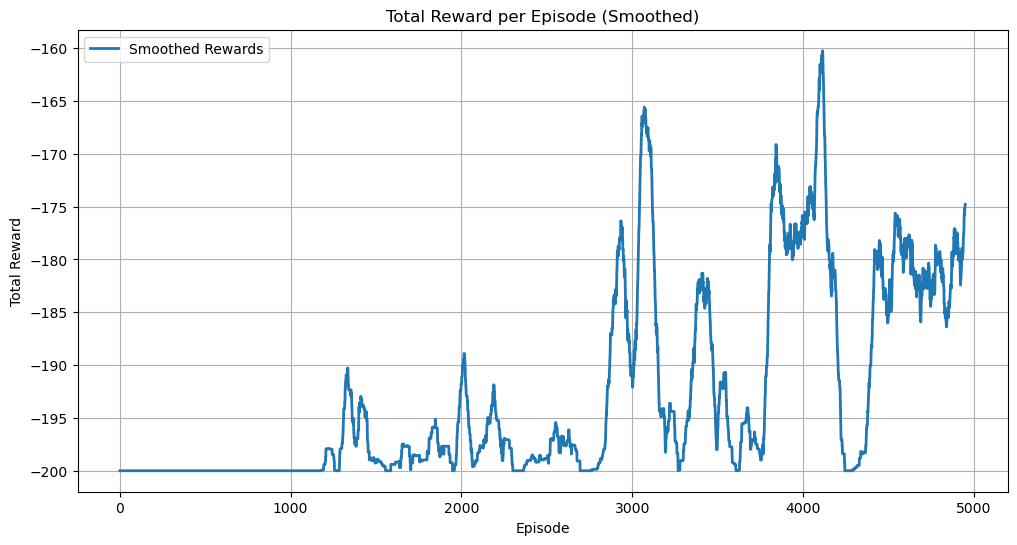

In [20]:
# Smooth rewards using moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(rewards, window_size=50)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards, label='Smoothed Rewards', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Smoothed)')
plt.grid(True)
plt.legend()
plt.show()

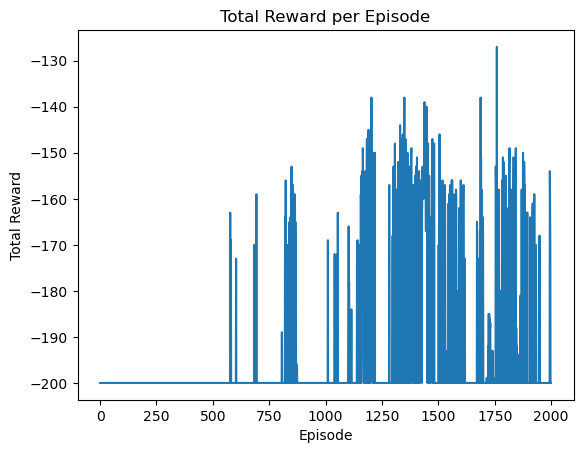

In [10]:
# Plotting the results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

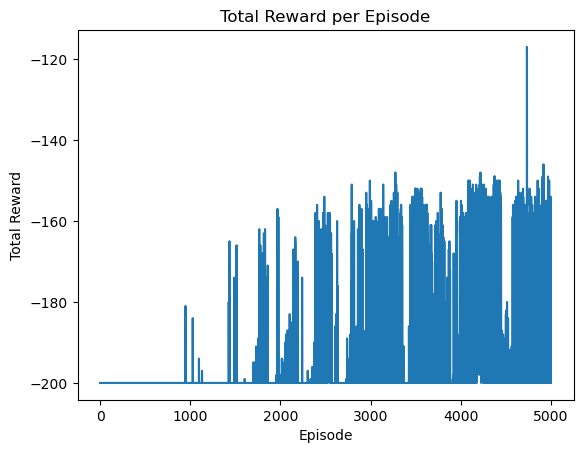

In [16]:
# Plotting the results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

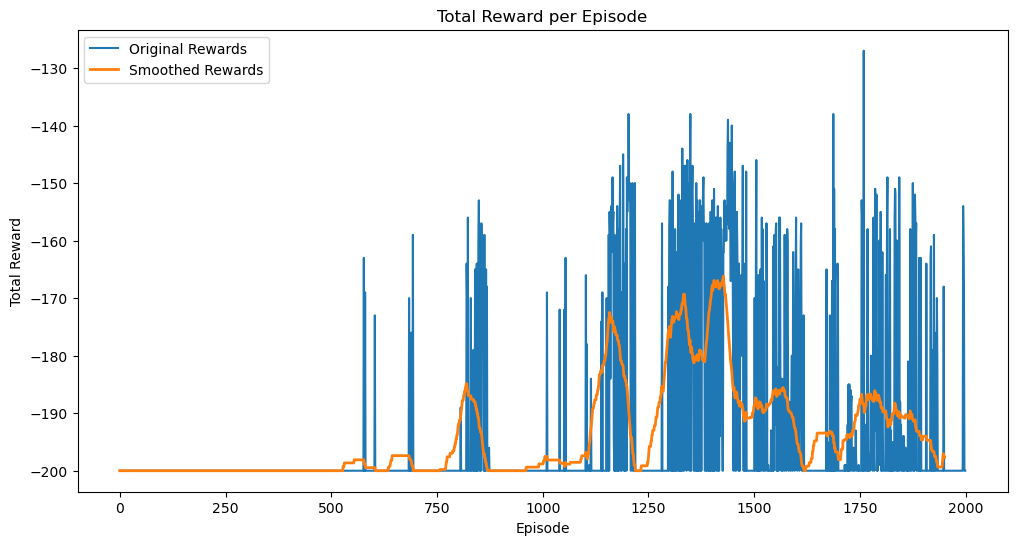

In [12]:
# Smooth rewards using moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_rewards = moving_average(rewards, window_size=50)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(rewards, label='Original Rewards')
plt.plot(range(len(smoothed_rewards)), smoothed_rewards, label='Smoothed Rewards', linewidth=2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.show()

Episode 100/5000: Total Reward = -200.0, Epsilon = 0.606
Episode 200/5000: Total Reward = -200.0, Epsilon = 0.367
Episode 300/5000: Total Reward = -200.0, Epsilon = 0.222
Episode 400/5000: Total Reward = -200.0, Epsilon = 0.135
Episode 500/5000: Total Reward = -200.0, Epsilon = 0.082
Episode 600/5000: Total Reward = -200.0, Epsilon = 0.049
Episode 700/5000: Total Reward = -200.0, Epsilon = 0.030
Episode 800/5000: Total Reward = -200.0, Epsilon = 0.018
Episode 900/5000: Total Reward = -200.0, Epsilon = 0.011
Episode 1000/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1100/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1200/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1300/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1400/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1500/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1600/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1700/5000: Total Reward = -200.0, Epsilon = 0.010
Episode 1800/5000: Tota

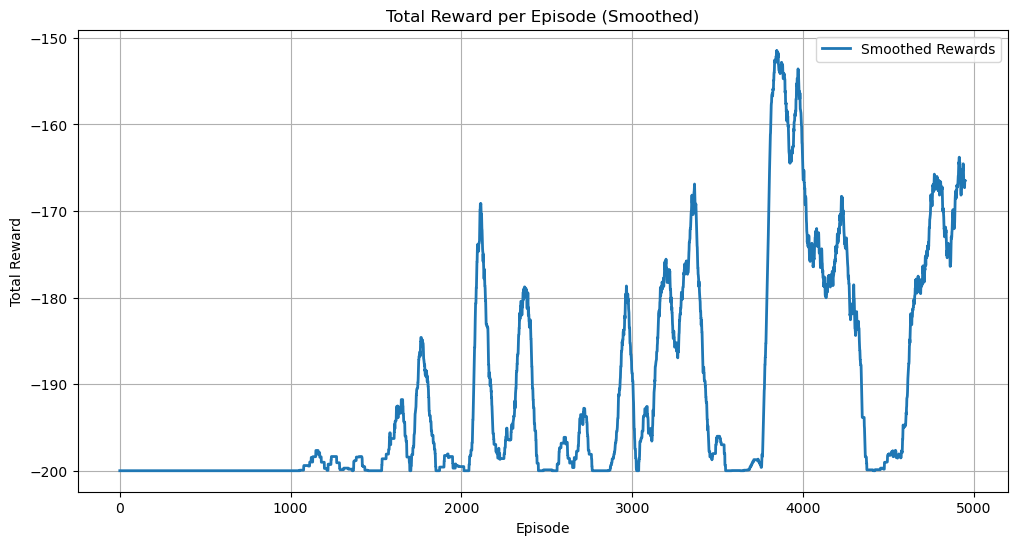

In [17]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

# Load MountainCar environment
env = gym.make('MountainCar-v0')

# Discretize position and velocity
position_bins = np.linspace(-1.2, 0.6, num=30)  # Increased to 30 bins for position
velocity_bins = np.linspace(-0.07, 0.07, num=30)  # Increased to 30 bins for velocity

def discretize_state(state):
    """Convert continuous state to discrete bins."""
    position, velocity = state
    pos_idx = np.clip(np.digitize(position, bins=position_bins) - 1, 0, len(position_bins) - 1)
    vel_idx = np.clip(np.digitize(velocity, bins=velocity_bins) - 1, 0, len(velocity_bins) - 1)
    return int(pos_idx), int(vel_idx)

# Initialize Q-table
num_actions = env.action_space.n  # MountainCar has 3 actions

q_table = {}
for position in range(len(position_bins)):
    for velocity in range(len(velocity_bins)):
        for action in range(num_actions):
            q_table[(position, velocity, action)] = 0.0  # Initialize Q-values to 0.0

# Epsilon-greedy policy
def epsilon_greedy(state, epsilon):
    """Choose an action using epsilon-greedy policy."""
    pos_idx, vel_idx = state
    if random.uniform(0, 1) < epsilon:
        action = random.choice(range(num_actions))
    else:
        action = np.argmax([q_table[(pos_idx, vel_idx, action)] for action in range(num_actions)])
    return action

# Q-learning parameters
alpha = 0.1  # Decreased learning rate
gamma = 0.99  # Increased discount factor
epsilon = 1.0  # Start with high exploration
epsilon_decay = 0.995  # Decay epsilon
min_epsilon = 0.01
num_episodes = 5000  # Increased number of episodes
num_steps = 200

# Training loop
rewards = []
for i in range(num_episodes):
    s, _ = env.reset()
    s = discretize_state(s)  # Discretize the initial state
    total_reward = 0

    for t in range(num_steps):
        # Select action using epsilon-greedy policy
        a = epsilon_greedy(s, epsilon)

        # Take the action and observe the next state and reward
        s_, r, done, _, _ = env.step(a)
        s_ = discretize_state(s_)

        # Update Q-value using Bellman equation
        best_next_action = np.argmax([q_table[(s_[0], s_[1], action)] for action in range(num_actions)])  # Max Q-value for next state
        q_table[(s[0], s[1], a)] += alpha * (r + gamma * q_table[(s_[0], s_[1], best_next_action)] - q_table[(s[0], s[1], a)])

        # Update state
        s = s_
        total_reward += r

        # Break if terminal state is reached
        if done:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

    rewards.append(total_reward)
    if (i + 1) % 100 == 0:
        print(f"Episode {i + 1}/{num_episodes}: Total Reward = {total_reward}, Epsilon = {epsilon:.3f}")

env.close()

# # Smooth rewards using moving average
# def moving_average(data, window_size):
#     return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# smoothed_rewards = moving_average(rewards, window_size=50)

# # Plotting the results
# plt.figure(figsize=(12, 6))
# plt.plot(smoothed_rewards, label='Smoothed Rewards', linewidth=2)
# plt.xlabel('Episode')
# plt.ylabel('Total Reward')
# plt.title('Total Reward per Episode (Smoothed)')
# plt.grid(True)
# plt.legend()
# plt.show()

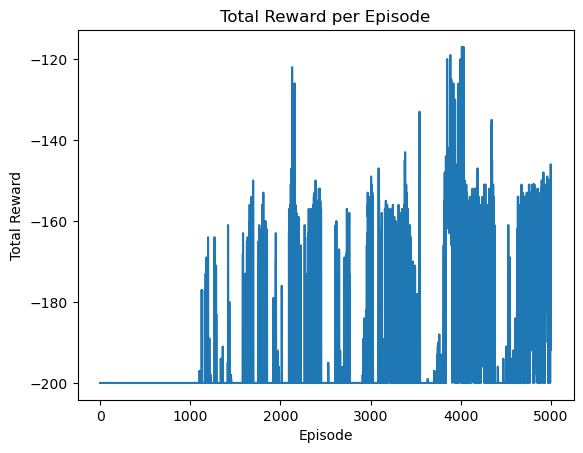

In [18]:
# Plotting the results
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()